In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
data= pd.read_csv("commute_notes_normal.csv")

In [3]:
data.head()

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home
0,16:59,17:01,17:04,17:27,17:29,18:03
1,17:00,17:02,17:05,17:28,17:40,18:16
2,NaN,NaN,17:05,17:28,17:45,18:22
3,16:48,16:50,16:56,17:17,17:25,18:00
4,16:55,16:56,17:00,17:21,NaN,18:18


In [4]:
data

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home
0,16:59,17:01,17:04,17:27,17:29,18:03
1,17:00,17:02,17:05,17:28,17:40,18:16
2,NaN,NaN,17:05,17:28,17:45,18:22
3,16:48,16:50,16:56,17:17,17:25,18:00
4,16:55,16:56,17:00,17:21,NaN,18:18
5,16:59,17:00,17:04,17:28,17:30,18:00
6,NaN,16:59,NaN,17:26,17:44,18:16
7,16:53,16:55,16:59,17:23,17:25,17:59
8,17:01,17:02,NaN,17:30,17:32,18:06
9,16:58,17:00,NaN,17:35,17:47,18:26


In [5]:
data.isnull().sum()

get_on_train     2
get_off_train    1
get_on_blue      4
get_off_blue     0
get_on_bus       2
get_home         1
dtype: int64

In [6]:
data.isnull().sum().sum()

10

In [7]:
data.dtypes

get_on_train     object
get_off_train    object
get_on_blue      object
get_off_blue     object
get_on_bus       object
get_home         object
dtype: object

In [8]:
#data.drop([2,12],inplace=True)

In [9]:
data

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home
0,16:59,17:01,17:04,17:27,17:29,18:03
1,17:00,17:02,17:05,17:28,17:40,18:16
2,NaN,NaN,17:05,17:28,17:45,18:22
3,16:48,16:50,16:56,17:17,17:25,18:00
4,16:55,16:56,17:00,17:21,NaN,18:18
5,16:59,17:00,17:04,17:28,17:30,18:00
6,NaN,16:59,NaN,17:26,17:44,18:16
7,16:53,16:55,16:59,17:23,17:25,17:59
8,17:01,17:02,NaN,17:30,17:32,18:06
9,16:58,17:00,NaN,17:35,17:47,18:26


In [10]:
lazy=data.copy()

In [11]:
lazy.dtypes

get_on_train     object
get_off_train    object
get_on_blue      object
get_off_blue     object
get_on_bus       object
get_home         object
dtype: object

In [12]:
lazy.dropna(inplace=True)

In [13]:
# for column in lazy.columns:
#     lazy[column]=lazy[column].astype(str)

In [14]:
lazy

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home
0,16:59,17:01,17:04,17:27,17:29,18:03
1,17:00,17:02,17:05,17:28,17:40,18:16
3,16:48,16:50,16:56,17:17,17:25,18:00
5,16:59,17:00,17:04,17:28,17:30,18:00
7,16:53,16:55,16:59,17:23,17:25,17:59
10,16:57,16:58,17:03,17:27,17:49,18:20
11,16:49,16:51,16:59,17:23,17:33,18:06


In [15]:
#inspiration https://stackoverflow.com/questions/14295673/convert-string-into-datetime-time-object

for column in lazy.columns:
    lazy[column] = lazy[column].map(lambda x:datetime.datetime.strptime(x,'%H:%M').time() )

In [16]:
lazy['time_of_commute']=""

In [17]:
lazy.head(1)

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home,time_of_commute
0,16:59:00,17:01:00,17:04:00,17:27:00,17:29:00,18:03:00,


In [18]:
lazy.reset_index(drop=True,inplace=True)

In [19]:
lazy

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home,time_of_commute
0,16:59:00,17:01:00,17:04:00,17:27:00,17:29:00,18:03:00,
1,17:00:00,17:02:00,17:05:00,17:28:00,17:40:00,18:16:00,
2,16:48:00,16:50:00,16:56:00,17:17:00,17:25:00,18:00:00,
3,16:59:00,17:00:00,17:04:00,17:28:00,17:30:00,18:00:00,
4,16:53:00,16:55:00,16:59:00,17:23:00,17:25:00,17:59:00,
5,16:57:00,16:58:00,17:03:00,17:27:00,17:49:00,18:20:00,
6,16:49:00,16:51:00,16:59:00,17:23:00,17:33:00,18:06:00,


In [20]:

for i in range(len(lazy.time_of_commute)):
    lazy['time_of_commute'][i]=\
    datetime.datetime.combine(datetime.date.today(),lazy['get_home'][i])-\
    datetime.datetime.combine(datetime.date.today(),lazy['get_on_train'][i])

In [21]:
lazy.head()

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home,time_of_commute
0,16:59:00,17:01:00,17:04:00,17:27:00,17:29:00,18:03:00,1:04:00
1,17:00:00,17:02:00,17:05:00,17:28:00,17:40:00,18:16:00,1:16:00
2,16:48:00,16:50:00,16:56:00,17:17:00,17:25:00,18:00:00,1:12:00
3,16:59:00,17:00:00,17:04:00,17:28:00,17:30:00,18:00:00,1:01:00
4,16:53:00,16:55:00,16:59:00,17:23:00,17:25:00,17:59:00,1:06:00


In [22]:
lazy.head()

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home,time_of_commute
0,16:59:00,17:01:00,17:04:00,17:27:00,17:29:00,18:03:00,1:04:00
1,17:00:00,17:02:00,17:05:00,17:28:00,17:40:00,18:16:00,1:16:00
2,16:48:00,16:50:00,16:56:00,17:17:00,17:25:00,18:00:00,1:12:00
3,16:59:00,17:00:00,17:04:00,17:28:00,17:30:00,18:00:00,1:01:00
4,16:53:00,16:55:00,16:59:00,17:23:00,17:25:00,17:59:00,1:06:00


In [23]:
lazy['train_len_red'] = ""
for i in range(len(lazy.time_of_commute)):
    lazy['train_len_red'][i]=\
    datetime.datetime.combine(datetime.date.today(),lazy['get_off_train'][i])-\
    datetime.datetime.combine(datetime.date.today(),lazy['get_on_train'][i])

In [24]:
lazy['wait_for_blue'] = ""
for i in range(len(lazy.time_of_commute)):
    lazy['wait_for_blue'][i]=\
    datetime.datetime.combine(datetime.date.today(),lazy['get_on_blue'][i])-\
    datetime.datetime.combine(datetime.date.today(),lazy['get_off_train'][i])

In [25]:
lazy['train_len_blue'] = ""
for i in range(len(lazy.time_of_commute)):
    lazy['train_len_blue'][i]=\
    datetime.datetime.combine(datetime.date.today(),lazy['get_off_blue'][i])-\
    datetime.datetime.combine(datetime.date.today(),lazy['get_on_blue'][i])

In [26]:
lazy['wait_for_bus'] = ""
for i in range(len(lazy.time_of_commute)):
    lazy['wait_for_bus'][i]=\
    datetime.datetime.combine(datetime.date.today(),lazy['get_on_bus'][i])-\
    datetime.datetime.combine(datetime.date.today(),lazy['get_off_blue'][i])

In [27]:
lazy['bus_len'] = ""
for i in range(len(lazy.time_of_commute)):
    lazy['bus_len'][i]=\
    datetime.datetime.combine(datetime.date.today(),lazy['get_home'][i])-\
    datetime.datetime.combine(datetime.date.today(),lazy['get_on_bus'][i])

In [28]:
lazy

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home,time_of_commute,train_len_red,wait_for_blue,train_len_blue,wait_for_bus,bus_len
0,16:59:00,17:01:00,17:04:00,17:27:00,17:29:00,18:03:00,1:04:00,0:02:00,0:03:00,0:23:00,0:02:00,0:34:00
1,17:00:00,17:02:00,17:05:00,17:28:00,17:40:00,18:16:00,1:16:00,0:02:00,0:03:00,0:23:00,0:12:00,0:36:00
2,16:48:00,16:50:00,16:56:00,17:17:00,17:25:00,18:00:00,1:12:00,0:02:00,0:06:00,0:21:00,0:08:00,0:35:00
3,16:59:00,17:00:00,17:04:00,17:28:00,17:30:00,18:00:00,1:01:00,0:01:00,0:04:00,0:24:00,0:02:00,0:30:00
4,16:53:00,16:55:00,16:59:00,17:23:00,17:25:00,17:59:00,1:06:00,0:02:00,0:04:00,0:24:00,0:02:00,0:34:00
5,16:57:00,16:58:00,17:03:00,17:27:00,17:49:00,18:20:00,1:23:00,0:01:00,0:05:00,0:24:00,0:22:00,0:31:00
6,16:49:00,16:51:00,16:59:00,17:23:00,17:33:00,18:06:00,1:17:00,0:02:00,0:08:00,0:24:00,0:10:00,0:33:00


In [29]:
#getting relevant variables
#lazy_train_len_red_avg = lazy['train_len_red'].mean()
#turns out you can not do means over datetime.timedelta objects

In [30]:
# #lazy_train_len_red_avg = 
#lazy['train_len_red'].seconds
# #.astype(int).mean()

#cant do as type int nor can you easily convert the whole series from delta time to datetime


In [31]:
lazy.columns

Index(['get_on_train', 'get_off_train', 'get_on_blue', 'get_off_blue',
       'get_on_bus', 'get_home', 'time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len'],
      dtype='object')

In [32]:
#convertime timedelta to int
for column in ['time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len']:
    lazy[column] = lazy[column].map(lambda x: x.seconds)

In [33]:
# converting seconds to minutes
for column in ['time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len']:
    lazy[column] = lazy[column].map(lambda x: x/60)

In [34]:
lazy.head()

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home,time_of_commute,train_len_red,wait_for_blue,train_len_blue,wait_for_bus,bus_len
0,16:59:00,17:01:00,17:04:00,17:27:00,17:29:00,18:03:00,64.0,2.0,3.0,23.0,2.0,34.0
1,17:00:00,17:02:00,17:05:00,17:28:00,17:40:00,18:16:00,76.0,2.0,3.0,23.0,12.0,36.0
2,16:48:00,16:50:00,16:56:00,17:17:00,17:25:00,18:00:00,72.0,2.0,6.0,21.0,8.0,35.0
3,16:59:00,17:00:00,17:04:00,17:28:00,17:30:00,18:00:00,61.0,1.0,4.0,24.0,2.0,30.0
4,16:53:00,16:55:00,16:59:00,17:23:00,17:25:00,17:59:00,66.0,2.0,4.0,24.0,2.0,34.0


In [35]:
for column in ['time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len']:
    print(column+" median is  "+str(lazy[column].median()))

time_of_commute median is  72.0
train_len_red median is  2.0
wait_for_blue median is  4.0
train_len_blue median is  24.0
wait_for_bus median is  8.0
bus_len median is  34.0


In [36]:
data

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home
0,16:59,17:01,17:04,17:27,17:29,18:03
1,17:00,17:02,17:05,17:28,17:40,18:16
2,NaN,NaN,17:05,17:28,17:45,18:22
3,16:48,16:50,16:56,17:17,17:25,18:00
4,16:55,16:56,17:00,17:21,NaN,18:18
5,16:59,17:00,17:04,17:28,17:30,18:00
6,NaN,16:59,NaN,17:26,17:44,18:16
7,16:53,16:55,16:59,17:23,17:25,17:59
8,17:01,17:02,NaN,17:30,17:32,18:06
9,16:58,17:00,NaN,17:35,17:47,18:26


In [37]:
#manually filling nulls
data['get_off_train'][2] = "17:01"
data['get_on_train'][2] = "16:59"
data['get_on_bus'][4] = "17:44"
data['get_on_train'][6] = "16:57"
data['get_on_blue'][6] = "17:02"
data['get_on_blue'][8]="17:06"
data['get_on_blue'][9] = "17:04"
data['get_on_blue'][12] ="16:46"
data['get_on_bus'][12]= "17:18"
data['get_home'][12]= "17:44"

In [38]:
data

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home
0,16:59,17:01,17:04,17:27,17:29,18:03
1,17:00,17:02,17:05,17:28,17:40,18:16
2,16:59,17:01,17:05,17:28,17:45,18:22
3,16:48,16:50,16:56,17:17,17:25,18:00
4,16:55,16:56,17:00,17:21,17:44,18:18
5,16:59,17:00,17:04,17:28,17:30,18:00
6,16:57,16:59,17:02,17:26,17:44,18:16
7,16:53,16:55,16:59,17:23,17:25,17:59
8,17:01,17:02,17:06,17:30,17:32,18:06
9,16:58,17:00,17:04,17:35,17:47,18:26


In [39]:

for column in data.columns:
    data[column] = data[column].map(lambda x:datetime.datetime.strptime(x,'%H:%M').time() )

In [40]:
data['time_of_commute']=""
for i in range(len(data.time_of_commute)):
    data['time_of_commute'][i]=\
    datetime.datetime.combine(datetime.date.today(),data['get_home'][i])-\
    datetime.datetime.combine(datetime.date.today(),data['get_on_train'][i])

In [41]:
data['train_len_red'] = ""
for i in range(len(data.time_of_commute)):
    data['train_len_red'][i]=\
    datetime.datetime.combine(datetime.date.today(),data['get_off_train'][i])-\
    datetime.datetime.combine(datetime.date.today(),data['get_on_train'][i])

In [42]:
data['wait_for_blue'] = ""
for i in range(len(data.time_of_commute)):
    data['wait_for_blue'][i]=\
    datetime.datetime.combine(datetime.date.today(),data['get_on_blue'][i])-\
    datetime.datetime.combine(datetime.date.today(),data['get_off_train'][i])

In [43]:
data['train_len_blue'] = ""
for i in range(len(data.time_of_commute)):
    data['train_len_blue'][i]=\
    datetime.datetime.combine(datetime.date.today(),data['get_off_blue'][i])-\
    datetime.datetime.combine(datetime.date.today(),data['get_on_blue'][i])

In [44]:
data['wait_for_bus'] = ""
for i in range(len(data.time_of_commute)):
    data['wait_for_bus'][i]=\
    datetime.datetime.combine(datetime.date.today(),data['get_on_bus'][i])-\
    datetime.datetime.combine(datetime.date.today(),data['get_off_blue'][i])

In [45]:
data['bus_len'] = ""
for i in range(len(data.time_of_commute)):
    data['bus_len'][i]=\
    datetime.datetime.combine(datetime.date.today(),data['get_home'][i])-\
    datetime.datetime.combine(datetime.date.today(),data['get_on_bus'][i])

In [46]:
data

,get_on_train,get_off_train,get_on_blue,get_off_blue,get_on_bus,get_home,time_of_commute,train_len_red,wait_for_blue,train_len_blue,wait_for_bus,bus_len
0,16:59:00,17:01:00,17:04:00,17:27:00,17:29:00,18:03:00,1:04:00,0:02:00,0:03:00,0:23:00,0:02:00,0:34:00
1,17:00:00,17:02:00,17:05:00,17:28:00,17:40:00,18:16:00,1:16:00,0:02:00,0:03:00,0:23:00,0:12:00,0:36:00
2,16:59:00,17:01:00,17:05:00,17:28:00,17:45:00,18:22:00,1:23:00,0:02:00,0:04:00,0:23:00,0:17:00,0:37:00
3,16:48:00,16:50:00,16:56:00,17:17:00,17:25:00,18:00:00,1:12:00,0:02:00,0:06:00,0:21:00,0:08:00,0:35:00
4,16:55:00,16:56:00,17:00:00,17:21:00,17:44:00,18:18:00,1:23:00,0:01:00,0:04:00,0:21:00,0:23:00,0:34:00
5,16:59:00,17:00:00,17:04:00,17:28:00,17:30:00,18:00:00,1:01:00,0:01:00,0:04:00,0:24:00,0:02:00,0:30:00
6,16:57:00,16:59:00,17:02:00,17:26:00,17:44:00,18:16:00,1:19:00,0:02:00,0:03:00,0:24:00,0:18:00,0:32:00
7,16:53:00,16:55:00,16:59:00,17:23:00,17:25:00,17:59:00,1:06:00,0:02:00,0:04:00,0:24:00,0:02:00,0:34:00
8,17:01:00,17:02:00,17:06:00,17:30:00,17:32:00,18:06:00,1:05:00,0:01:00,0:04:00,0:24:00,0:02:00,0:34:00
9,16:58:00,17:00:00,17:04:00,17:35:00,17:47:00,18:26:00,1:28:00,0:02:00,0:04:00,0:31:00,0:12:00,0:39:00


In [47]:
for column in ['time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len']:
    data[column] = data[column].map(lambda x: x.seconds)

In [48]:
for column in ['time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len']:
    data[column] = data[column].map(lambda x: x/60)

In [49]:
for column in ['time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len']:
    print(column+" median is  "+str(data[column].median()))

time_of_commute median is  76.0
train_len_red median is  2.0
wait_for_blue median is  4.0
train_len_blue median is  24.0
wait_for_bus median is  10.0
bus_len median is  34.0


In [50]:
for column in ['time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len']:
    print(column+" median is  "+str(lazy[column].median()))

time_of_commute median is  72.0
train_len_red median is  2.0
wait_for_blue median is  4.0
train_len_blue median is  24.0
wait_for_bus median is  8.0
bus_len median is  34.0


In [51]:
for column in ['time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len']:
    print(column+" standard deviation is  "+str(round(data[column].std(),2)))

time_of_commute standard deviation is  9.11
train_len_red standard deviation is  0.48
wait_for_blue standard deviation is  1.38
train_len_blue standard deviation is  2.41
wait_for_bus standard deviation is  7.6
bus_len standard deviation is  3.28


In [58]:
for column in ['time_of_commute', 'train_len_red',
       'wait_for_blue', 'train_len_blue', 'wait_for_bus', 'bus_len']:
    print(column+" mean is  "+str(round(data[column].mean(),2)))

time_of_commute mean is  73.92
train_len_red mean is  1.69
wait_for_blue mean is  4.31
train_len_blue mean is  23.85
wait_for_bus mean is  10.62
bus_len mean is  33.46


Text(0.5, 1.0, 'wait for bus length and\ntime of commute')

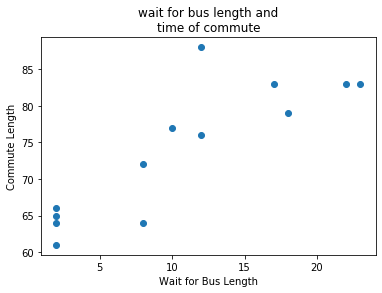

In [53]:
plt.scatter(data['wait_for_bus'],data['time_of_commute'])
plt.xlabel('Wait for Bus Length')
plt.ylabel('Commute Length')
plt.title('wait for bus length and\ntime of commute')

Text(0.5, 1.0, 'blue line train ride length and\ntime of commute')

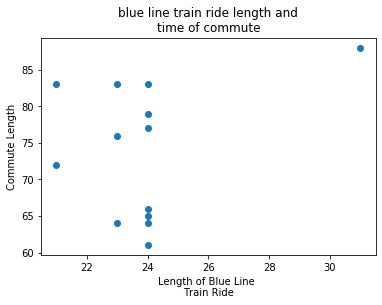

In [54]:
plt.scatter(data['train_len_blue'],data['time_of_commute'])
plt.xlabel('Length of Blue Line \nTrain Ride')
plt.ylabel('Commute Length')
plt.title('blue line train ride length and\ntime of commute')

In [55]:
data['wait_for_bus']

0      2.0
1     12.0
2     17.0
3      8.0
4     23.0
5      2.0
6     18.0
7      2.0
8      2.0
9     12.0
10    22.0
11    10.0
12     8.0
Name: wait_for_bus, dtype: float64

(array([4., 0., 0., 2., 1., 2., 0., 0., 1., 1., 0., 2.]),
 array([ 2.  ,  3.75,  5.5 ,  7.25,  9.  , 10.75, 12.5 , 14.25, 16.  ,
        17.75, 19.5 , 21.25, 23.  ]),
 <a list of 12 Patch objects>)

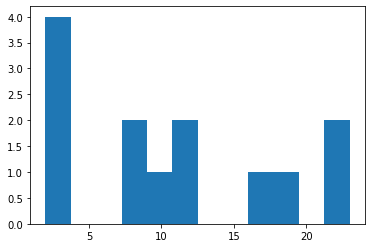

In [56]:
plt.hist(data['wait_for_bus'],bins=12)

In [57]:
data['time_of_commute'].mean(),data['time_of_commute'].std(),len(data['time_of_commute'])

(73.92307692307692, 9.105506927692517, 13)